In [39]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

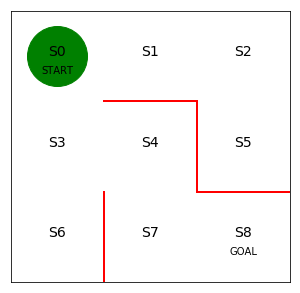

In [40]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [41]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [42]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義


def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

In [43]:
# 初期の方策pi_0を求める
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [44]:
# 行動aと1step移動後の状態sを求める関数を定義


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [45]:
# 迷路を解く関数の定義、状態と行動の履歴を出力


def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [46]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 1], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は8です


In [48]:
# thetaの更新関数を定義します


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [49]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.49687504 0.         0.50312496]
 [0.         0.         0.5        0.5       ]
 [0.33054408 0.33891184 0.33054408 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49687504 0.50312496 0.         0.        ]]


In [50]:
# 方策勾配法で迷路を解く

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.014285289134548518
迷路を解くのにかかったステップ数は14です
0.024405059233268245
迷路を解くのにかかったステップ数は8です
0.02101106833817723
迷路を解くのにかかったステップ数は16です
0.007914259081968855
迷路を解くのにかかったステップ数は108です
0.040349213265827355
迷路を解くのにかかったステップ数は6です
0.008014351170495315
迷路を解くのにかかったステップ数は74です
0.009958633473507117
迷路を解くのにかかったステップ数は48です
0.020006477095198483
迷路を解くのにかかったステップ数は14です
0.010283656720146472
迷路を解くのにかかったステップ数は30です
0.03435038285534914
迷路を解くのにかかったステップ数は10です
0.014377860845062318
迷路を解くのにかかったステップ数は56です
0.019619668036398752
迷路を解くのにかかったステップ数は28です
0.017257003722895015
迷路を解くのにかかったステップ数は32です
0.013294954647980806
迷路を解くのにかかったステップ数は38です
0.007913219939609695
迷路を解くのにかかったステップ数は38です
0.003824599416335117
迷路を解くのにかかったステップ数は34です
0.009169279036745526
迷路を解くのにかかったステップ数は86です
0.012808577029538692
迷路を解くのにかかったステップ数は38です
0.014747180105665447
迷路を解くのにかかったステップ数は44です
0.022558887369222735
迷路を解くのにかかったステップ数は24です
0.016781679149808604
迷路を解くのにかかったステップ数は20です
0.008679221765816203
迷路を解くのにかかったステップ数は84です
0.029799581132627373
迷路を解くのにかかったステップ数は8です
0.0146784338276

0.025929245807996548
迷路を解くのにかかったステップ数は4です
0.025579274452859013
迷路を解くのにかかったステップ数は12です
0.012938547748677004
迷路を解くのにかかったステップ数は90です
0.01563728666318928
迷路を解くのにかかったステップ数は10です
0.021682640119656815
迷路を解くのにかかったステップ数は12です
0.019843047291953936
迷路を解くのにかかったステップ数は6です
0.014634685486105498
迷路を解くのにかかったステップ数は12です
0.019862181854751193
迷路を解くのにかかったステップ数は10です
0.0178138473294977
迷路を解くのにかかったステップ数は8です
0.02584313682128095
迷路を解くのにかかったステップ数は6です
0.025344957230357623
迷路を解くのにかかったステップ数は4です
0.012756401353165692
迷路を解くのにかかったステップ数は16です
0.025301412438921866
迷路を解くのにかかったステップ数は6です
0.015955023440158034
迷路を解くのにかかったステップ数は6です
0.024985336156488985
迷路を解くのにかかったステップ数は6です
0.019018928491698506
迷路を解くのにかかったステップ数は6です
0.024433748777683395
迷路を解くのにかかったステップ数は4です
0.01923178504999598
迷路を解くのにかかったステップ数は8です
0.017896674003118923
迷路を解くのにかかったステップ数は16です
0.024170375214942807
迷路を解くのにかかったステップ数は4です
0.021905296208162478
迷路を解くのにかかったステップ数は20です
0.018605348179632886
迷路を解くのにかかったステップ数は6です
0.02376552996956663
迷路を解くのにかかったステップ数は4です
0.023417265747126437
迷路を解くのにかかっ

0.007610925585932876
迷路を解くのにかかったステップ数は4です
0.00752291001637144
迷路を解くのにかかったステップ数は4です
0.01471953453507567
迷路を解くのにかかったステップ数は8です
0.007560205482539439
迷路を解くのにかかったステップ数は4です
0.010102502783498626
迷路を解くのにかかったステップ数は6です
0.008729872304733308
迷路を解くのにかかったステップ数は6です
0.010094472827168563
迷路を解くのにかかったステップ数は6です
0.009081224411881028
迷路を解くのにかかったステップ数は10です
0.007697027345063501
迷路を解くのにかかったステップ数は4です
0.0076066198078196395
迷路を解くのにかかったステップ数は4です
0.017538457851865544
迷路を解くのにかかったステップ数は10です
0.0076936469475123725
迷路を解くのにかかったステップ数は4です
0.008501977080735343
迷路を解くのにかかったステップ数は6です
0.007596343175150164
迷路を解くのにかかったステップ数は4です
0.009955440146880629
迷路を解くのにかかったステップ数は6です
0.0075661069684158505
迷路を解くのにかかったステップ数は4です
0.009890788655454452
迷路を解くのにかかったステップ数は6です
0.007537261854878893
迷路を解くのにかかったステップ数は4です
0.017457299687996378
迷路を解くのにかかったステップ数は10です
0.0134213351109259
迷路を解くのにかかったステップ数は10です
0.007769316961906081
迷路を解くのにかかったステップ数は4です
0.00767566977240669
迷路を解くのにかかったステップ数は4です
0.00758358767972056
迷路を解くのにかかったステップ数は4です
0.007493040159669201
迷路を解くのにかかったス

0.0058680381794808945
迷路を解くのにかかったステップ数は6です
0.0027794479497237
迷路を解くのにかかったステップ数は4です
0.0027582085635908665
迷路を解くのにかかったステップ数は4です
0.006651216368060965
迷路を解くのにかかったステップ数は10です
0.0027394789549876203
迷路を解くのにかかったステップ数は4です
0.002718727256173649
迷路を解くのにかかったステップ数は4です
0.005288148971035508
迷路を解くのにかかったステップ数は6です
0.007447251534866785
迷路を解くのにかかったステップ数は8です
0.0027617961379106312
迷路を解くのにかかったステップ数は4です
0.002740785097113646
迷路を解くのにかかったステップ数は4です
0.006073316704219192
迷路を解くのにかかったステップ数は8です
0.00274862904452048
迷路を解くのにかかったステップ数は4です
0.002727822049380532
迷路を解くのにかかったステップ数は4です
0.002707246957460059
迷路を解くのにかかったステップ数は4です
0.002686900391610493
迷路を解くのにかかったステップ数は4です
0.002666779034653441
迷路を解くのにかかったステップ数は4です
0.0026468796281440624
迷路を解くのにかかったステップ数は4です
0.0026271989711621896
迷路を解くのにかかったステップ数は4です
0.006377921408506446
迷路を解くのにかかったステップ数は6です
0.0026435116472742284
迷路を解くのにかかったステップ数は4です
0.0026237744828464943
迷路を解くのにかかったステップ数は4です
0.002604254993557896
迷路を解くのにかかったステップ数は4です
0.002584950033432745
迷路を解くのにかかったステップ数は4です
0.006348635887713325
迷路を解くのに

0.0011780239792603883
迷路を解くのにかかったステップ数は4です
0.0011720742937104262
迷路を解くのにかかったステップ数は4です
0.0011661693391483569
迷路を解くのにかかったステップ数は4です
0.0035694199093557546
迷路を解くのにかかったステップ数は6です
0.0011736000865921956
迷路を解くのにかかったステップ数は4です
0.001167684254185751
迷路を解くのにかかったステップ数は4です
0.0011618127812764792
迷路を解くのにかかったステップ数は4です
0.0011559852275972934
迷路を解くのにかかったステップ数は4です
0.0011502011583009036
迷路を解くのにかかったステップ数は4です
0.001144460143881039
迷路を解くのにかかったステップ数は4です
0.0011387617600926644
迷路を解くのにかかったステップ数は4です
0.0011331055878774157
迷路を解くのにかかったステップ数は4です
0.0011274912132869172
迷路を解くのにかかったステップ数は4です
0.0011219182274095837
迷路を解くのにかかったステップ数は4です
0.0011163862262945218
迷路を解くのにかかったステップ数は4です
0.0011108948108856306
迷路を解くのにかかったステップ数は4です
0.0011054435869467874
迷路を解くのにかかったステップ数は4です
0.005144209167261153
迷路を解くのにかかったステップ数は8です
0.0011228569720049056
迷路を解くのにかかったステップ数は4です
0.0011173155233049278
迷路を解くのにかかったステップ数は4です
0.0011118147370140427
迷路を解くのにかかったステップ数は4です
0.001106354218555164
迷路を解くのにかかったステップ数は4です
0.003563258484409297
迷路を解くのにかかったステップ数は6です
0.00111486227828

0.0007870320343417864
迷路を解くのにかかったステップ数は4です
0.0007837654938471494
迷路を解くのにかかったステップ数は4です
0.0007805191525937366
迷路を解くのにかかったステップ数は4です
0.003329498145462524
迷路を解くのにかかったステップ数は6です
0.0007892230332068248
迷路を解くのにかかったステップ数は4です
0.000785932391583033
迷路を解くのにかかったステップ数は4です
0.0007826622316267559
迷路を解くのにかかったステップ数は4です
0.0007794123840262346
迷路を解くのにかかったステップ数は4です
0.0007761826812117609
迷路を解くのにかかったステップ数は4です
0.0033594503202295303
迷路を解くのにかかったステップ数は6です
0.002947319199313063
迷路を解くのにかかったステップ数は6です
0.0007952148769545808
迷路を解くのにかかったステップ数は4です
0.0007918740203669353
迷路を解くのにかかったステップ数は4です
0.0007885541532273374
迷路を解くのにかかったステップ数は4です
0.0007852551001733682
迷路を解くのにかかったステップ数は4です
0.0007819766876704382
迷路を解くのにかかったステップ数は4です
0.0033921917784327862
迷路を解くのにかかったステップ数は6です
0.002680944544167098
迷路を解くのにかかったステップ数は6です
0.0007951935736293728
迷路を解くのにかかったステップ数は4です
0.0007918503760550345
迷路を解くのにかかったステップ数は4です
0.0007885282246810933
迷路を解くのにかかったステップ数は4です
0.0007852269430388727
迷路を解くのにかかったステップ数は4です
0.0007819463565053968
迷路を解くのにかかったステップ数は4です
0.0007786862922

0.00048703166459101305
迷路を解くのにかかったステップ数は4です
0.00048538558222872494
迷路を解くのにかかったステップ数は4です
0.0004837479051378532
迷路を解くのにかかったステップ数は4です
0.0025156502875890996
迷路を解くのにかかったステップ数は6です
0.0004905322011740723
迷路を解くのにかかったステップ数は4です
0.0004888633890053513
迷路を解くのにかかったステップ数は4です
0.00048720316497660385
迷路を解くのにかかったステップ数は4です
0.00048555146989937015
迷路を解くのにかかったステップ数は4です
0.00048390824509739194
迷路を解くのにかかったステップ数は4です
0.0004822734323966897
迷路を解くのにかかったステップ数は4です
0.0004806469741254482
迷路を解くのにかかったステップ数は4です
0.00047902881310465245
迷路を解くのにかかったステップ数は4です
0.0004774188926452601
迷路を解くのにかかったステップ数は4です
0.0004758171565425462
迷路を解くのにかかったステップ数は4です
0.0004742235490716555
迷路を解くのにかかったステップ数は4です
0.00047263801498199573
迷路を解くのにかかったステップ数は4です
0.0004710604994918148
迷路を解くのにかかったステップ数は4です
0.001975946564697694
迷路を解くのにかかったステップ数は6です
0.00047179956083657354
迷路を解くのにかかったステップ数は4です
0.0004702321115181325
迷路を解くのにかかったステップ数は4です
0.0004686725292844078
迷路を解くのにかかったステップ数は4です
0.0004671207612789996
迷路を解くのにかかったステップ数は4です
0.005809345043949244
迷路を解くのにかかったステップ数は6です
0.000

0.0003242897650803968
迷路を解くのにかかったステップ数は4です
0.0003234003136212797
迷路を解くのにかかったステップ数は4です
0.0003225145503563884
迷路を解くのにかかったステップ数は4です
0.00032163245474696803
迷路を解くのにかかったステップ数は4です
0.005331385775725811
迷路を解くのにかかったステップ数は6です
0.00032332175578941164
迷路を解くのにかかったステップ数は4です
0.0003224391017606944
迷路を解くのにかかったステップ数は4です
0.00532795598953564
迷路を解くのにかかったステップ数は6です
0.00032430654841008114
迷路を解くのにかかったステップ数は4です
0.00032342242675997834
迷路を解くのにかかったステップ数は4です
0.00032254193857411337
迷路を解くのにかかったステップ数は4です
0.002114877716724209
迷路を解くのにかかったステップ数は6です
0.00032771655719177756
迷路を解くのにかかったステップ数は4です
0.0003268147154873967
迷路を解くのにかかったステップ数は4です
0.00032591662404373237
迷路を解くのにかかったステップ数は4です
0.00032502226191653827
迷路を解くのにかかったステップ数は4です
0.001763200342333085
迷路を解くのにかかったステップ数は6です
0.00032673792678391406
迷路を解くのにかかったステップ数は4です
0.0003258428307651752
迷路を解くのにかかったステップ数は4です
0.00032495143418896644
迷路を解くのにかかったステップ数は4です
0.00032406371654770255
迷路を解くのにかかったステップ数は4です
0.0017954652429602522
迷路を解くのにかかったステップ数は6です
0.00032597838336018495
迷路を解くのにかかったステップ数は4です
0.00

0.0002251420297626483
迷路を解くのにかかったステップ数は4です
0.0002246271197210159
迷路を解くのにかかったステップ数は4です
0.002326792659379174
迷路を解くのにかかったステップ数は8です
0.0002296518910066339
迷路を解くのにかかったステップ数は4です
0.0016529576645467753
迷路を解くのにかかったステップ数は6です
0.0002320132692948916
迷路を解くのにかかったステップ数は4です
0.00023147382295274355
迷路を解くのにかかったステップ数は4です
0.00023093627236219286
迷路を解くのにかかったステップ数は4です
0.00023040060857875896
迷路を解くのにかかったステップ数は4です
0.0002298668227130561
迷路を解くのにかかったステップ数は4です
0.00022933490592528388
迷路を解くのにかかったステップ数は4です
0.0002288048494310871
迷路を解くのにかかったステップ数は4です
0.00022827664449663262
迷路を解くのにかかったステップ数は4です
0.00022775028243914378
迷路を解くのにかかったステップ数は4です
0.00022722575462836084
迷路を解くのにかかったステップ数は4です
0.00022670305248292943
迷路を解くのにかかったステップ数は4です
0.00022618216747435568
迷路を解くのにかかったステップ数は4です
0.0002256630911214967
迷路を解くのにかかったステップ数は4です
0.0002251458149956781
迷路を解くのにかかったステップ数は4です
0.00022463033071508723
迷路を解くのにかかったステップ数は4です
0.00022411662994898177
迷路を解くのにかかったステップ数は4です
0.00022360470441389751
迷路を解くのにかかったステップ数は4です
0.00022309454587515418
迷路を解くのにかかったステップ数は4です

0.00013609433870994878
迷路を解くのにかかったステップ数は4です
0.00013585265088300429
迷路を解くのにかかったステップ数は4です
0.00013561161024411468
迷路を解くのにかかったステップ数は4です
0.00013537121447032736
迷路を解くのにかかったステップ数は4です
0.00013513146125146945
迷路を解くのにかかったステップ数は4です
0.0001348923482839392
迷路を解くのにかかったステップ数は4です
0.00013465387327830577
迷路を解くのにかかったステップ数は4です
0.00013441603395408439
迷路を解くのにかかったステップ数は4です
0.0001341788280397084
迷路を解くのにかかったステップ数は4です
0.00013394225327538305
迷路を解くのにかかったステップ数は4です
0.00013370630741102452
迷路を解くのにかかったステップ数は4です
0.00013347098820660347
迷路を解くのにかかったステップ数は4です
0.00013323629343185359
迷路を解くのにかかったステップ数は4です
0.00013300222086671566
迷路を解くのにかかったステップ数は4です
0.00013276876830097505
迷路を解くのにかかったステップ数は4です
0.00013253593353388347
迷路を解くのにかかったステップ数は4です
0.0001323037143762494
迷路を解くのにかかったステップ数は4です
0.00013207210864521826
迷路を解くのにかかったステップ数は4です
0.00013184111417133618
迷路を解くのにかかったステップ数は4です
0.00013161072879249065
迷路を解くのにかかったステップ数は4です
0.00013138095035683008
迷路を解くのにかかったステップ数は4です
0.00013115177672183218
迷路を解くのにかかったステップ数は4です
0.00013092320575515577
迷路を解くのにかかったス

0.00010509871981072803
迷路を解くのにかかったステップ数は4です
0.0011271318843120368
迷路を解くのにかかったステップ数は6です
0.00010647623730478638
迷路を解くのにかかったステップ数は4です
0.00010630776221442345
迷路を解くのにかかったステップ数は4です
0.0001061396905335174
迷路を解くのにかかったステップ数は4です
0.00010597202096514213
迷路を解くのにかかったステップ数は4です
0.00010580475221436819
迷路を解くのにかかったステップ数は4です
0.00010563788299515486
迷路を解くのにかかったステップ数は4です
0.00010547141202421444
迷路を解くのにかかったステップ数は4です
0.00010530533802439665
迷路を解くのにかかったステップ数は4です
0.00010513965972389072
迷路を解くのにかかったステップ数は4です
0.00010497437585491737
迷路を解くのにかかったステップ数は4です
0.00010480948515599262
迷路を解くのにかかったステップ数は4です
0.00010464498636985481
迷路を解くのにかかったステップ数は4です
0.00010448087824533464
迷路を解くのにかかったステップ数は4です
0.00010431715953519716
迷路を解くのにかかったステップ数は4です
0.00010415382899783485
迷路を解くのにかかったステップ数は4です
0.00010399088539636558
迷路を解くのにかかったステップ数は4です
0.00010382832749921897
迷路を解くのにかかったステップ数は4です
0.00010366615407858028
迷路を解くのにかかったステップ数は4です
0.00010350436391416175
迷路を解くのにかかったステップ数は4です
0.0001033429557871033
迷路を解くのにかかったステップ数は4です
0.00010318192848624529
迷路を解くのにかかったス

In [51]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.013 0.987 0.   ]
 [0.    0.258 0.    0.742]
 [0.    0.    0.426 0.574]
 [0.012 0.977 0.012 0.   ]
 [0.    0.    0.983 0.017]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.012 0.988 0.    0.   ]]


In [52]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())